In [112]:
%load_ext watermark
%watermark
import pandas as pd #Visualizar datos
import numpy as np  #Trabajar con matrices
%matplotlib inline
import matplotlib.pyplot as plt #Para el gráfico
plt.rcParams['figure.figsize']=(15,15)
plt.rcParams['font.size']=16
# Regresión lineal múltiple. https://es.wikipedia.org/wiki/Regresión_lineal
# Yt= α +β1X1}+βX2...βnXn}+ e
# Para calcular alpha α = media(y) - producto escalarB * media (x)
# El objetivo es obtener β con  método de los mínimos cuadrados para lo cual se aplica 
# β = Inversa(XT * X) * XT *y  Es decir la matriz inversa β = (XT * X)-1 * XT *y      -1 es la inversa

vehiculos=pd.read_csv("C:/Users/alvar/Documents/DataScientis/Machine learning/vehiculos.csv") #Para visualizar todos los datos
vehiculos.head()


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-11-05T17:47:47+01:00

CPython 3.7.0
IPython 6.5.0

compiler   : MSC v.1912 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
CPU cores  : 4
interpreter: 64bit


,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783


In [113]:
vehiculo=pd.read_csv("C:/Users/alvar/Documents/DataScientis/Machine learning/vehiculos.csv",usecols=["consumo", "co2", "cilindros", "desplazamiento"])
#Se utiliza solo las columnas "consumo", "co2", "cilindros", "desplazamiento"])
vehiculo.head()

,desplazamiento,cilindros,consumo,co2
0,2.5,4.0,17,522.764706
1,4.2,6.0,13,683.615385
2,2.5,4.0,16,555.437500
3,4.2,6.0,13,683.615385
4,3.8,6.0,16,555.437500


In [181]:
pct_entrenar = 0.8 #Para entrenar con el 80 por ciento de los datos, el 20 por ciento es para test
vehiculos_entrenar=vehiculo.sample (frac=pct_entrenar) #se utiliza la función sample paraentrenar
vehiculos_test=vehiculo[~vehiculo.index.isin(vehiculos_entrenar.index)]#Vehiculos que no están es decir el 20 por ciento restante
print (vehiculos_entrenar.shape) #Para saber la forma de la matriz
#print (vehiculos_entrenar)  Se puede visualizar todos los registros
print(vehiculos_test.shape)


(28431, 4)
(7108, 4)


In [182]:
variables_independientes=['desplazamiento','cilindros','consumo']
variable_dependiente='co2'
X=vehiculos_entrenar[variables_independientes].as_matrix()
y=vehiculos_entrenar[variable_dependiente].as_matrix()
#Se aplica la fórmula β = (XT * X)-1* XT *y
traspuesta_X=X.transpose() 
#print (X)
traspuesta_X
#Se calcula beta
b=np.linalg.inv(traspuesta_X @ X)@traspuesta_X@y
#Así se obtiene β1,β2,β3:   β1parea desplazamiento,β2 para cilindros,β3 para consumo
b

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([47.53433943, 35.80543471,  5.09243255])

In [115]:
alpha= y.mean() - np.dot(b,vehiculos_entrenar[variables_independientes].mean().as_matrix())
#y.mean 
#- np.dot(b,vehiculos_entrenar[variables_independientes].mean().as_matrix())
#Producto escalar
#alfa = y.mean() - np.dot(betas,vehiculos_training[variables_independientes].mean().as_matrix())
alpha

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([47.70664405, 35.54354929,  5.14973356])

In [135]:
def predecir(r):
       return alpha+np.dot(b,r.values)



C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


6.868967811012567

C:\Users\alvar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


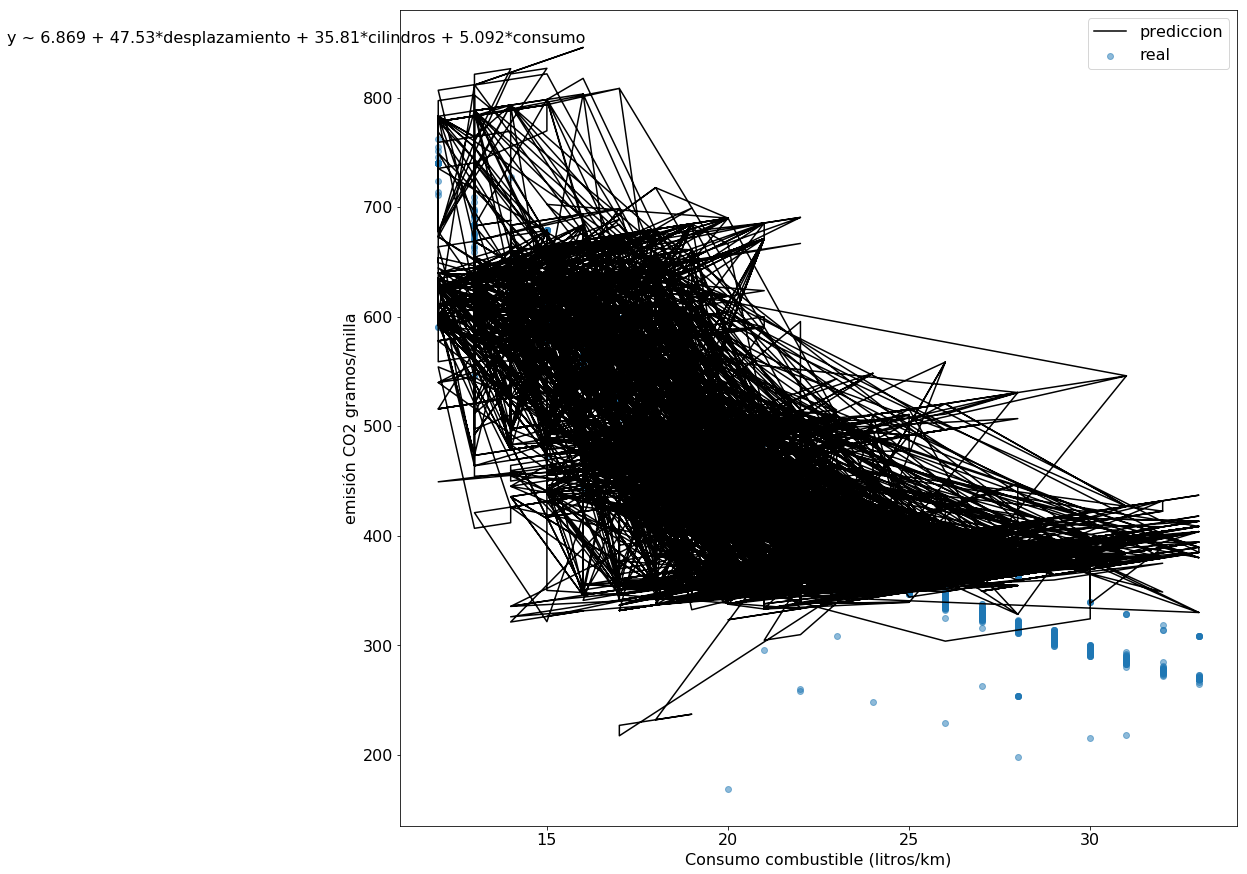

In [189]:
vehiculos_entrenar["co2_pred"] = vehiculos_entrenar[variables_independientes].apply(predecir, axis=1)
vehiculos_test["co2_pred"] = vehiculos_test[variables_independientes].apply(predecir, axis=1)
#Se aplica la fórmula:   ~ se utiliza para aproxima.
modelo="y ~ {alpha:.3f} + {b_1:.2f}*desplazamiento + {b_2:.2f}*cilindros + {b_3:.3f}*consumo".format(
    alpha=alpha, b_1=b[0], b_2=b[1], b_3=b[2])
plt.scatter(vehiculos_test.consumo, vehiculos_test.co2, alpha=0.5, label="real")
plt.text(0.1, 850, modelo)
plt.plot(vehiculos_test.consumo, vehiculos_test.co2_pred , c="black", label='prediccion')
plt.xlabel("Consumo combustible (litros/km)")
plt.ylabel("emisión CO2 gramos/milla")
plt.legend();
    
    